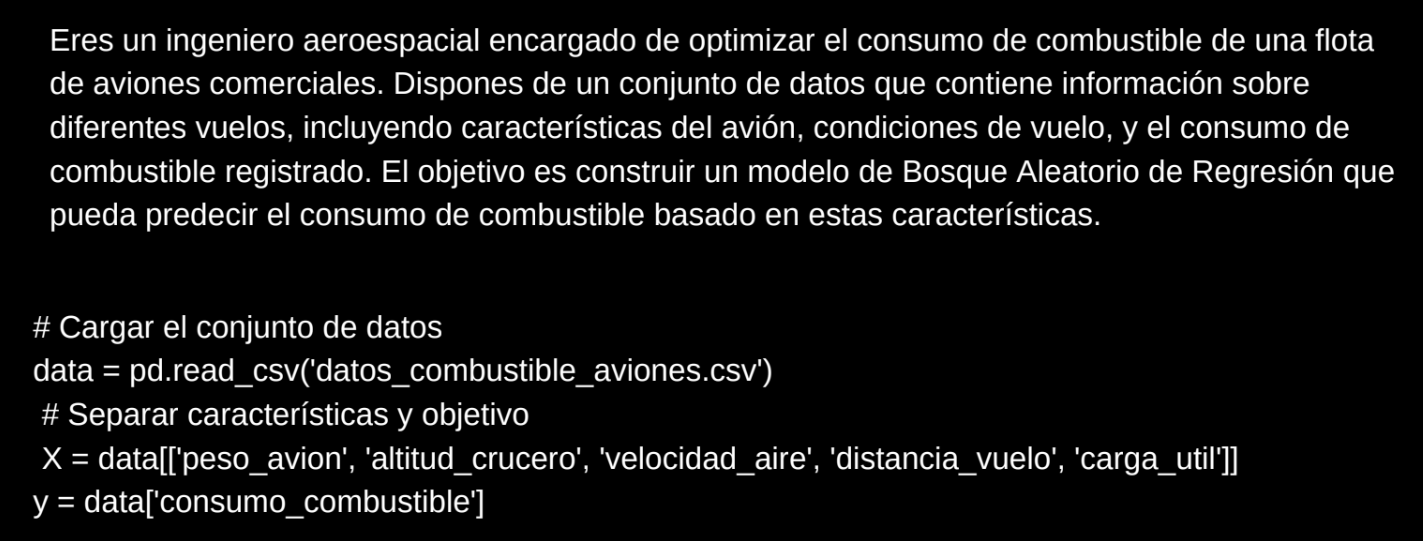

Error Cuadrático Medio (MSE): 3233.0
Coeficiente de Determinación (R^2): -0.2931999999999999


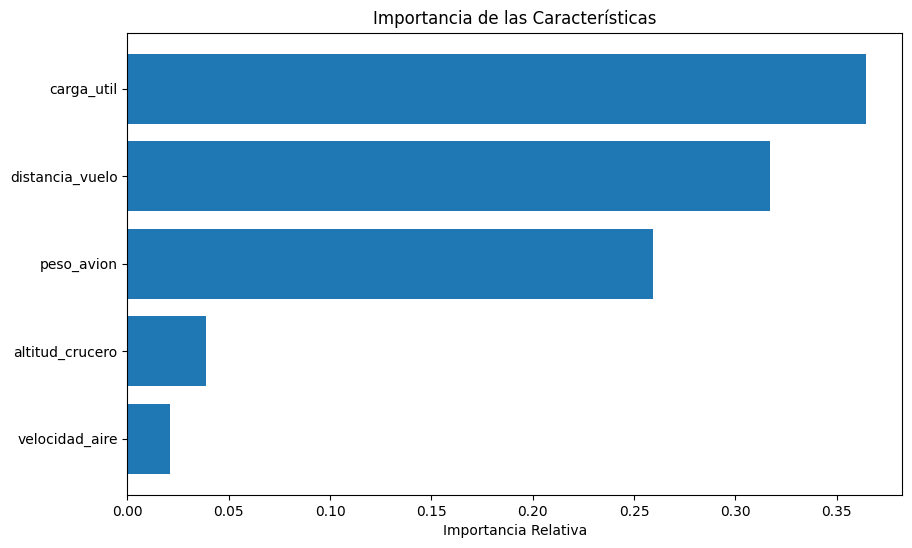

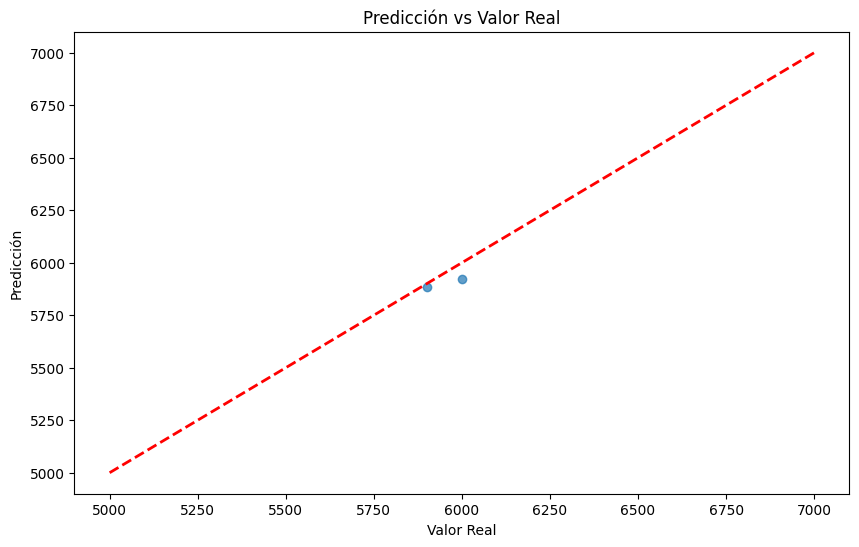

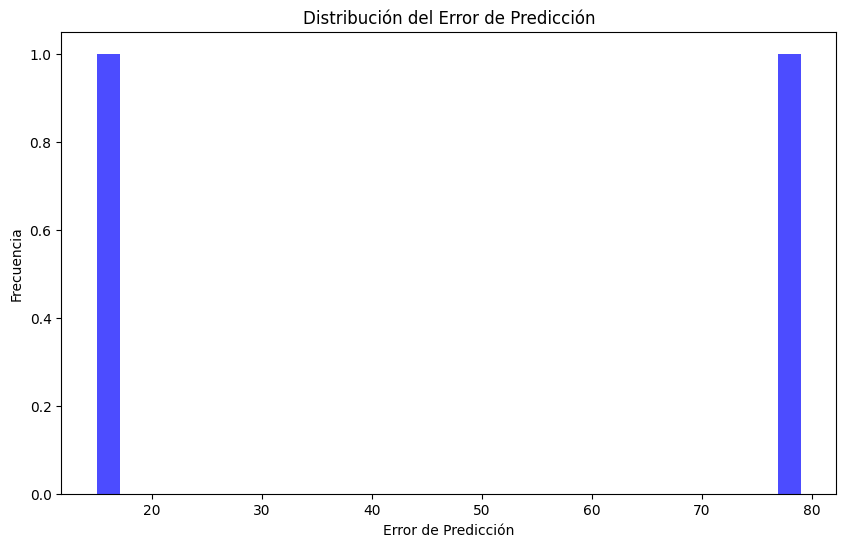

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos
#data = pd.read_csv('datos_combustible_aviones.csv')
data = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Ciencia de Datos con Python IEEE AESS\codigo\base de datos\datos_combustible_aviones.csv')

# Separar características y objetivo
X = data[['peso_avion', 'altitud_crucero', 'velocidad_aire', 'distancia_vuelo', 'carga_util']]
y = data['consumo_combustible']  #target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosque Aleatorio con parámetros ajustados
model = RandomForestRegressor(n_estimators =100, random_state = 0)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Visualizar la importancia de las características
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicción vs Valor Real')
plt.show()

# Graficar la distribución del error
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='b')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error de Predicción')
plt.show()



In [5]:
from sklearn.utils import Bunch
# Separar características y objetivo
X = data[['peso_avion', 'altitud_crucero', 'velocidad_aire', 'distancia_vuelo', 'carga_util']]
y = data['consumo_combustible']

nombres_columnas = ['Peso', 'Altitud', 'velocidad', 'distancia', 'carga', 'consumo']

# Crear el Bunch
dataset = Bunch(data=X, target=y, feature_names=nombres_columnas[:-1], target_names=['consumo_combustible'])

X_features= dataset.data
y_prices = dataset.target

y_predicted = model.predict(X_features)
dfAP = pd.DataFrame({'Actual': y_prices, 'Predicción': y_predicted})
dfAP.head(10)

,Actual,Predicción
0,5000,5259.0
1,6000,5921.0
2,7000,6874.0
3,5500,5521.0
4,6500,6489.0
5,6200,6188.0
6,5800,5789.0
7,6400,6405.0
8,5900,5885.0
9,6600,6565.0


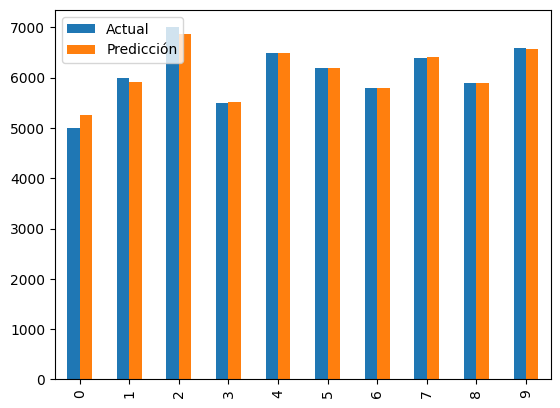

In [4]:
dfAP.head (30).plot(kind='bar')
plt.show()